<a href="https://colab.research.google.com/github/amannain122/stock_price_analysis/blob/main/notebooks/etl_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Fetch full historical data for the S&P 500 index
sp500 = yf.download("^GSPC", period="max")  # 'period="max"' fetches all available data
sp500.to_csv("S&P_500_data.csv")

[*********************100%***********************]  1 of 1 completed


In [4]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [5]:
sp500.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [6]:
# Define the dependent variable as the next day's opening price
sp500["Open_Target"] = sp500["Open"].shift(-1)

# Drop the last row with NaN in the target column
sp500 = sp500.dropna()

# Display the DataFrame to confirm the target column
sp500.tail()

,Open,High,Low,Close,Adj Close,Volume,Open_Target
Date,,,,,,,
2024-11-04,5725.149902,5741.430176,5696.509766,5712.689941,5712.689941,3602060000,5722.430176
2024-11-05,5722.430176,5783.439941,5722.100098,5782.759766,5782.759766,3768310000,5864.890137
2024-11-06,5864.890137,5936.140137,5864.890137,5929.040039,5929.040039,6329530000,5947.209961
2024-11-07,5947.209961,5983.839844,5947.209961,5973.100098,5973.100098,4925740000,5976.759766
2024-11-08,5976.759766,6012.450195,5976.759766,5995.540039,5995.540039,4666740000,6008.859863


In [7]:
sp500.describe()

,Open,High,Low,Close,Adj Close,Volume,Open_Target
count,24332.000000,24332.000000,24332.000000,24332.000000,24332.000000,2.433200e+04,24332.000000
mean,630.831369,654.370874,646.571408,650.719991,650.719991,9.146862e+08,631.077596
std,1077.898061,1072.779197,1060.840815,1067.193078,1067.193078,1.623890e+09,1078.442143
min,0.000000,4.400000,4.400000,4.400000,4.400000,0.000000e+00,0.000000
25%,9.720000,24.719999,24.719999,24.719999,24.719999,1.540000e+06,9.720000
50%,43.200001,103.309998,101.634998,102.430000,102.430000,2.063500e+07,43.220001
75%,1043.082520,1049.952515,1034.037506,1043.082520,1043.082520,1.015300e+09,1043.644989
max,5976.759766,6012.450195,5976.759766,5995.540039,5995.540039,1.145623e+10,6008.859863


## EDA

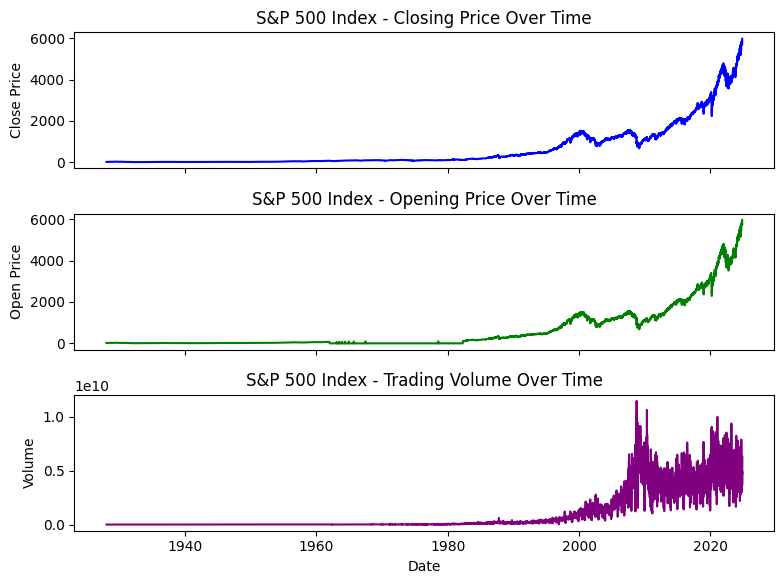

In [8]:
# Set up the subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
sns.set(style="whitegrid")

# Plot Closing Price
sns.lineplot(data=sp500, x="Date", y="Close", color="blue", ax=axs[0])
axs[0].set_title("S&P 500 Index - Closing Price Over Time")
axs[0].set_ylabel("Close Price")

# Plot Opening Price
sns.lineplot(data=sp500, x="Date", y="Open", color="green", ax=axs[1])
axs[1].set_title("S&P 500 Index - Opening Price Over Time")
axs[1].set_ylabel("Open Price")

# Plot Trading Volume
sns.lineplot(data=sp500, x="Date", y="Volume", color="purple", ax=axs[2])
axs[2].set_title("S&P 500 Index - Trading Volume Over Time")
axs[2].set_ylabel("Volume")
axs[2].set_xlabel("Date")

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-9-efb77575883b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500.loc[:, "Daily_Return"] = sp500["Close"].pct_change() * 100


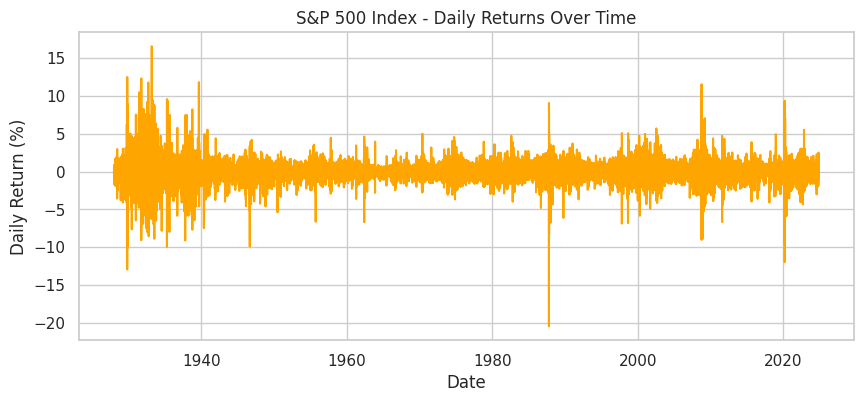

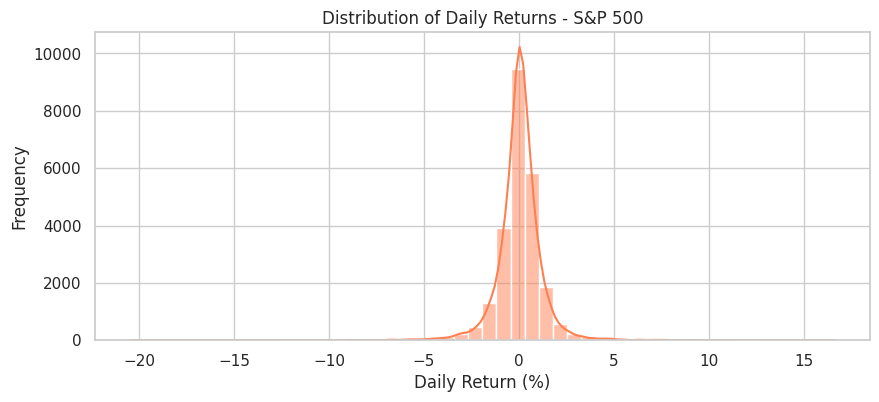

In [9]:
# Calculate daily returns
sp500.loc[:, "Daily_Return"] = sp500["Close"].pct_change() * 100

# Plot daily returns with a smaller chart
plt.figure(figsize=(10, 4))
sns.lineplot(data=sp500, x="Date", y="Daily_Return", color="orange")
plt.title("S&P 500 Index - Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.show()


plt.figure(figsize=(10, 4))
sns.histplot(sp500['Daily_Return'].dropna(), bins=50, color="coral", kde=True)
plt.title("Distribution of Daily Returns - S&P 500")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-10-fa8db6860db6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500.loc[:, "50_MA"] = sp500["Close"].rolling(window=50).mean()
<ipython-input-10-fa8db6860db6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500.loc[:, "30D_Volatility"] = sp500["Close"].rolling(window=30).std()


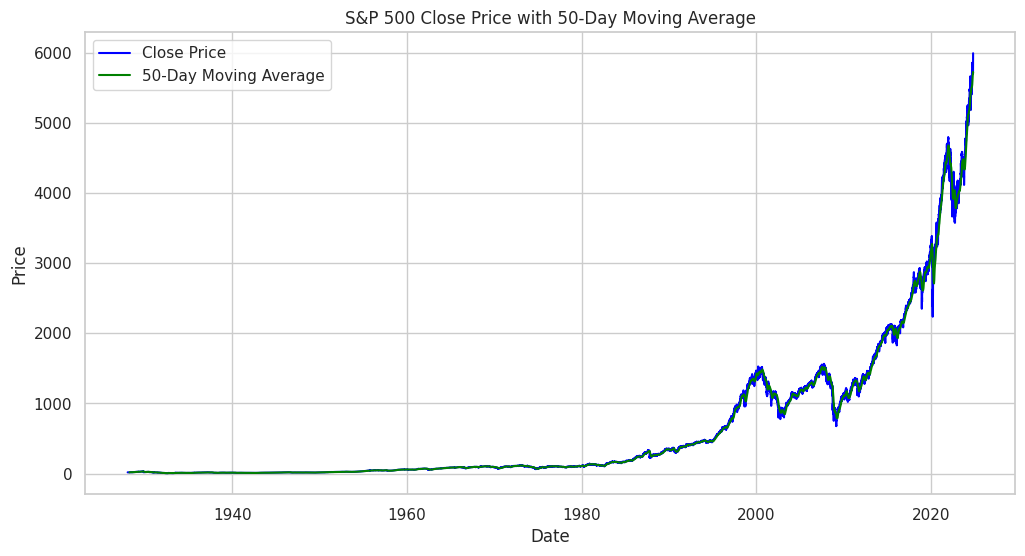

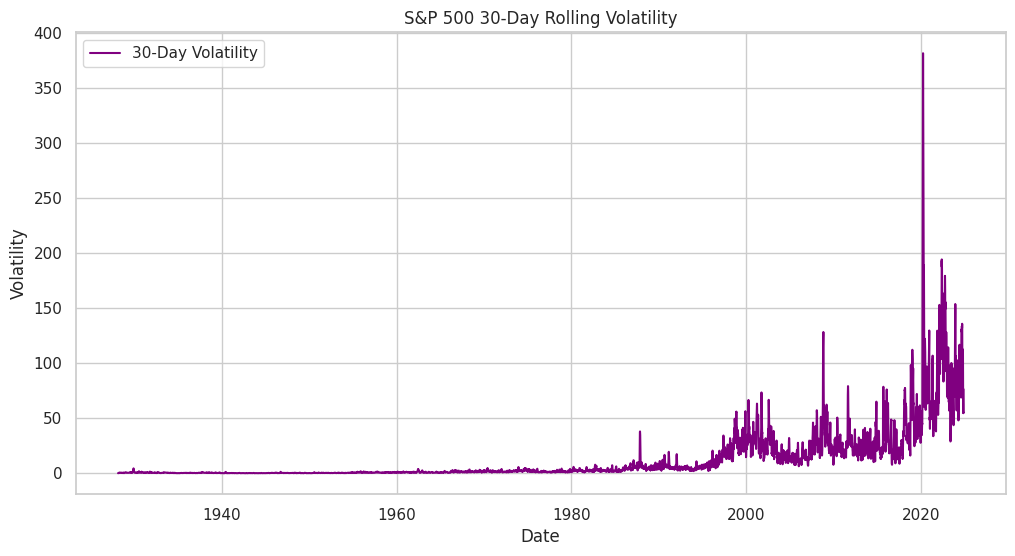

In [10]:
# Calculate 50-day Moving Average and 30-day Volatility
sp500.loc[:, "50_MA"] = sp500["Close"].rolling(window=50).mean()
sp500.loc[:, "30D_Volatility"] = sp500["Close"].rolling(window=30).std()

# Plot closing price with 50-day moving average
plt.figure(figsize=(12, 6))
sns.lineplot(data=sp500, x="Date", y="Close", color="blue", label="Close Price")
sns.lineplot(data=sp500, x="Date", y="50_MA", color="green", label="50-Day Moving Average")
plt.title("S&P 500 Close Price with 50-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot 30-day rolling volatility
plt.figure(figsize=(12, 6))
sns.lineplot(data=sp500, x="Date", y="30D_Volatility", color="purple", label="30-Day Volatility")
plt.title("S&P 500 30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

In [11]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Open_Target,Daily_Return,50_MA,30D_Volatility
Date,,,,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,17.760000,NaN,NaN,NaN
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,17.719999,0.566254,NaN,NaN
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,17.549999,-0.225230,NaN,NaN
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,17.660000,-0.959368,NaN,NaN
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,17.500000,0.626784,NaN,NaN


In [12]:
sp500 = sp500.dropna()

sp500.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Open_Target,0
Daily_Return,0
50_MA,0
30D_Volatility,0


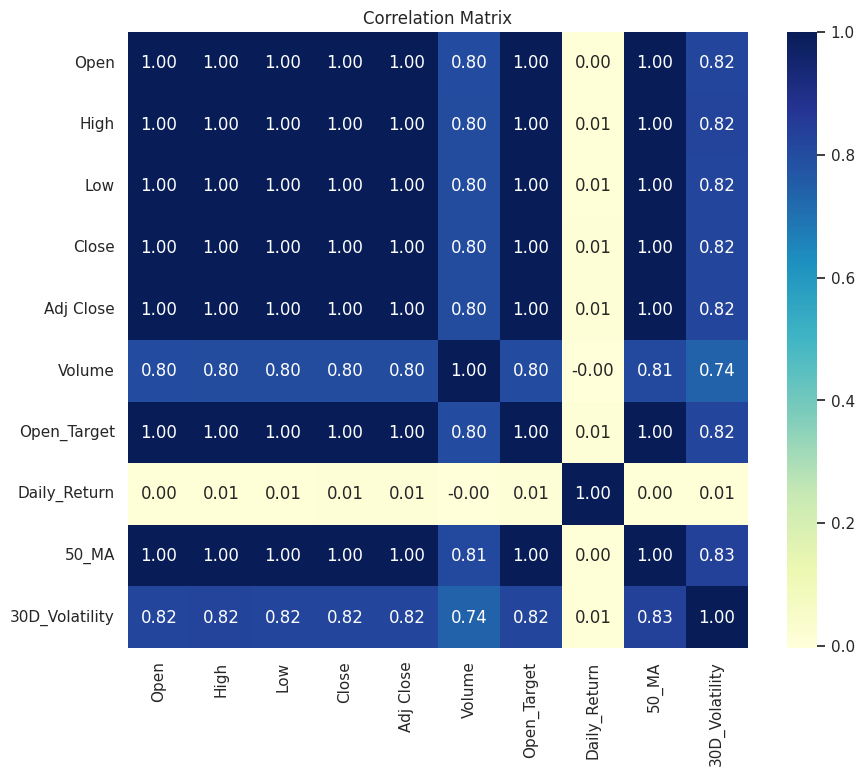

In [13]:
corr = sp500.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [14]:
sp500.drop(columns=["Daily_Return","Volume", "30D_Volatility"], inplace=True)

In [15]:
sp500.to_csv("S&P_500_data_cleaned.csv")